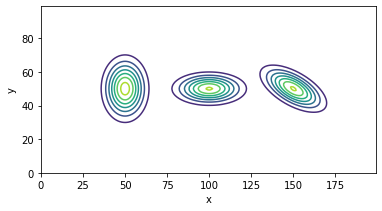

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import math

x, y = np.mgrid[0:200, 0:100]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

a = multivariate_normal(mean=[50, 50], cov=[[50, 0], [0, 100]])
b = multivariate_normal(mean=[100, 50], cov=[[125, 0], [0, 25]])
c = multivariate_normal(mean=[150, 50], cov=[[100, -25*math.sqrt(3)], [-25*math.sqrt(3), 50]])

for e in [a, b, c]:
    plt.contour(x, y, e.pdf(pos))
    
plt.gca().set_aspect('equal')
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

plt.show()

In [8]:
eig_vals, eig_vec = np.linalg.eig(c.cov)

print(eig_vec)

print("固有値：", eig_vals)
print("固有ベクトル1：", eig_vec[:, 0])
print("固有ベクトル2：", eig_vec[:, 1])

[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]
固有値： [125.  25.]
固有ベクトル1： [ 0.8660254 -0.5      ]
固有ベクトル2： [0.5       0.8660254]


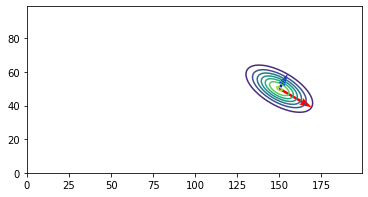

In [9]:
plt.contour(x, y, c.pdf(pos))

v = 2 * math.sqrt(eig_vals[0]) * eig_vec[:, 0]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color="red", angles='xy', scale_units='xy', scale=1)

v = 2 * math.sqrt(eig_vals[1]) * eig_vec[:, 1]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color="blue", angles='xy', scale_units='xy', scale=1)

plt.gca().set_aspect('equal')

plt.show()

In [11]:
V = eig_vec # 固有ベクトルを並べたもの
L = np.diag(eig_vals) # 固有値をdiagで対角行列にする

print("分解したものを計算", V.dot(L.dot(np.linalg.inv(V))))
print("元の共分散行列", c.cov)

分解したものを計算 [[100.         -43.30127019]
 [-43.30127019  50.        ]]
元の共分散行列 [[100.         -43.30127019]
 [-43.30127019  50.        ]]
